<a href="https://colab.research.google.com/github/hadwin-357/ML_Chem/blob/main/Molecular_Fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook to learn rdkit FingerPrints for query clustering

In [3]:
!pip install rdkit-pypi==2022.3.1.1
!pip install mordred

In [4]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors

In [5]:
#download data
url = 'https://raw.githubusercontent.com/gashawmg/molecular-descriptors/main/Orbital_Energies_input_data.csv'
dataset = pd.read_csv(url)
dataset.shape

(2904, 2)

In [6]:
dataset.head(10)

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
5,OC(C=C)C=C,210.979194
6,O=N(=O)c1ccc(Cl)c(c1)N(=O)=O,168.833179
7,O=CC1CCCCC1,213.451579
8,COc1ccc(cc1)C#C,171.191985
9,Brc1cncnc1,188.344944


In [7]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(dataset, 'SMILES','Structure')

,SMILES,Energygap,Structure
0,Cc1ccc(cc1)C(F)(F)F,197.749421,
1,OC(=O)CCCCl,247.493942,
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,
3,Nc1ccc(Cl)c(Cl)c1,169.027707,
4,C[C@@H](CCO)CCC=C(C)C,209.569808,

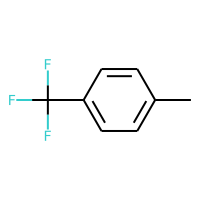
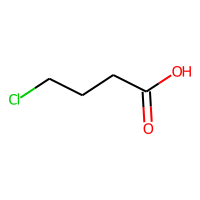
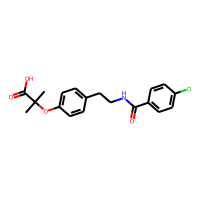
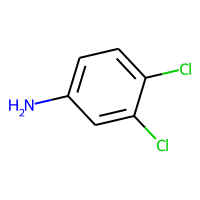
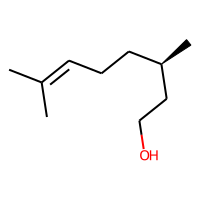

In [8]:
dataset.head(5)

In [9]:
#manually adding descriptors
dataset['MW']=dataset['Structure'].map(Descriptors.MolWt)
dataset['logP']=dataset['Structure'].map(Descriptors.MolLogP)

In [10]:
# write a functin to calculate all kinds of properties
def RDkit_descriptors(similes):
  ''' function to calculate all properties
  Arg: smiles string list
  return: decriptor name in tuple
  descriptor value in list (each mol has a list)
  '''
  mols =[Chem.MolFromSmiles(mol) for mol in similes]
  # properties to calculate
  calc = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList[:5])
  desc_names = calc.GetDescriptorNames() # descript name in tuple

  Mol_descriptors=[]
  for mol in mols:
    #add hygdrogen
    mol=Chem.AddHs(mol)
    #calculate all descriptors
    descriptors = calc.CalcDescriptors(mol)
    Mol_descriptors.append(descriptors)
  return Mol_descriptors, desc_names


# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset['SMILES'])

In [11]:
dataset.columns

Index(['SMILES', 'Energygap', 'Structure', 'MW', 'logP'], dtype='object')

In [12]:
len(Mol_descriptors),len(desc_names)

(2904, 5)

In [13]:
Mol_descriptors[0]

(12.550509731670445,
 -5.076351095993955,
 12.550509731670445,
 1.008796296296296,
 0.546827691373411)

In [14]:
#add descriptor info to dataset


In [15]:
# Genearte FingerPrint for molecueles

# MACSC Kyes

from rdkit.Chem import MACCSkeys
Mkeys =MACCSkeys.GenMACCSKeys(dataset.Structure[0])
print(np.array(Mkeys))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0]


In [16]:
# get index where value is 1
print('Index of on bits:' ,tuple(Mkeys.GetOnBits()))
#or
print('Index of on bits:', np.nonzero(Mkeys))

Index of on bits: (42, 106, 107, 112, 134, 160, 162, 163, 165)
Index of on bits: (array([ 42, 106, 107, 112, 134, 160, 162, 163, 165]),)


In [17]:
# Morgan-Circular Fingerprints
#only Morgan-Circular and RDKFignerprint can be drawn
onbits={}
mf= AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[1],2, nBits=512, bitInfo = onbits)
print(np.array(mf))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
print('on bits:', tuple(mf.GetOnBits()))
print(onbits)

on bits: (28, 42, 80, 85, 86, 138, 147, 201, 263, 295, 375, 381, 389, 428, 432)
{28: ((3, 1),), 42: ((4, 2),), 80: ((3, 0), (4, 0), (5, 0)), 85: ((6, 1),), 86: ((3, 2),), 138: ((2, 0),), 147: ((6, 0),), 201: ((1, 1),), 263: ((1, 2),), 295: ((0, 0), (1, 0)), 375: ((4, 1),), 381: ((2, 1),), 389: ((0, 1),), 428: ((5, 2),), 432: ((5, 1),)}


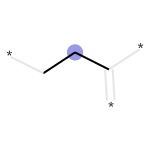

In [19]:
# draw on bits
from rdkit.Chem import Draw
Draw.DrawMorganBit(dataset.Structure[1],28, onbits)

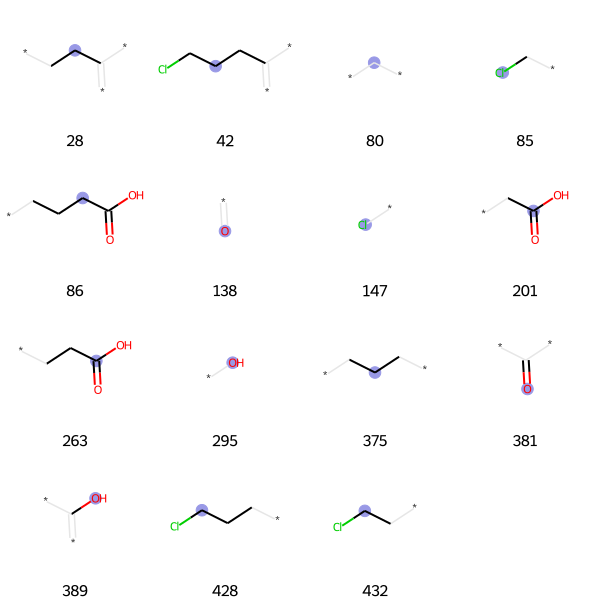

In [20]:
fragment=[(dataset.Structure[1], x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(fragment[:], molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

# Measuring Molecular Similarity

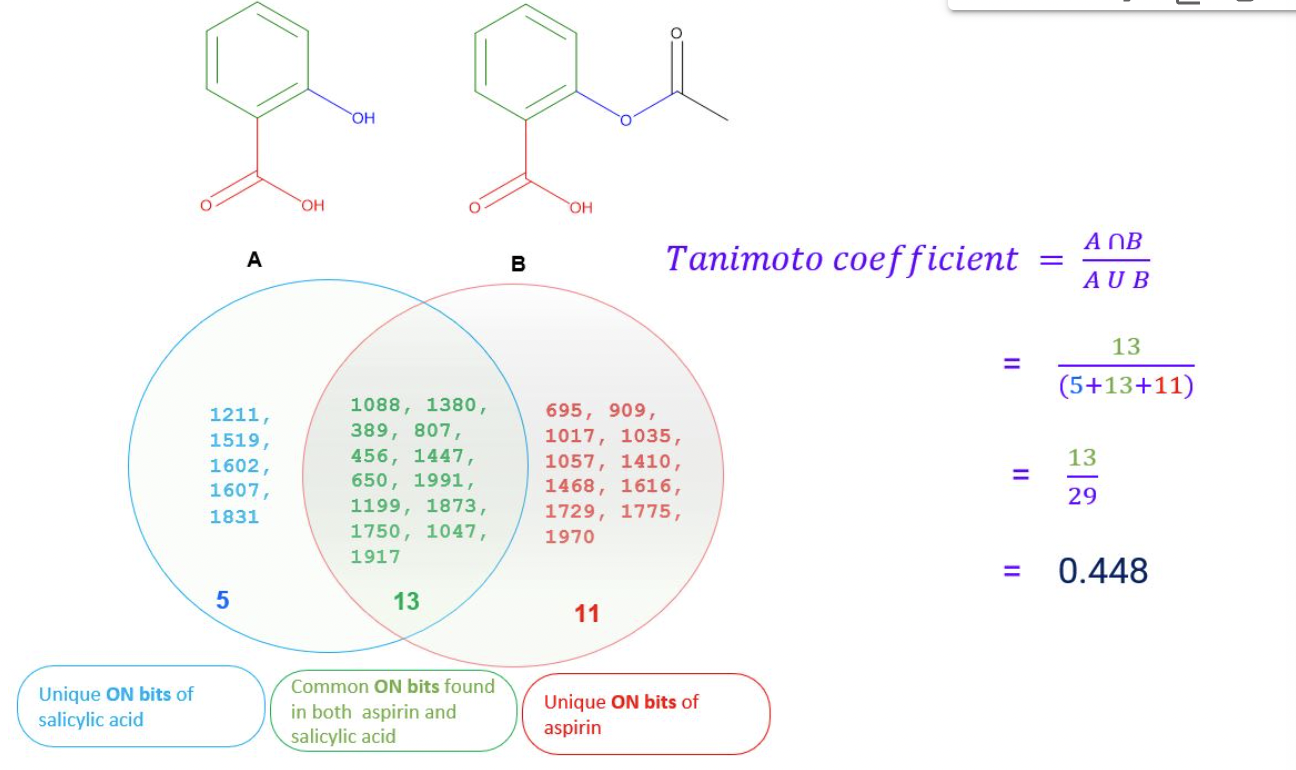

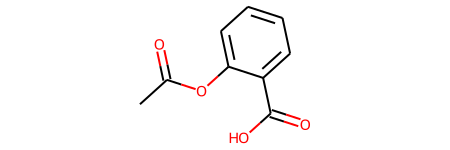

In [21]:
aspirin = AllChem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

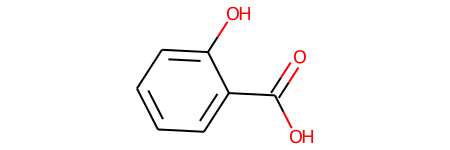

In [22]:
salicylic_acid = AllChem.MolFromSmiles('O=C(O)c1ccccc1O')
salicylic_acid

In [23]:
#generate fingerprint for both molecule
bit_asp = {}
bit_sal = {}

aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=2048, bitInfo=bit_asp)
salicylic_acid_fp = AllChem.GetMorganFingerprintAsBitVect(salicylic_acid, 2, nBits=2048, bitInfo=bit_sal)

In [24]:
print("Salicylic acid:", sorted(set(salicylic_acid_fp.GetOnBits())))
print("Aspirin", sorted(set(aspirin_fp.GetOnBits())))

Salicylic acid: [389, 456, 650, 807, 1047, 1088, 1199, 1211, 1380, 1447, 1519, 1602, 1607, 1750, 1831, 1873, 1917, 1991]
Aspirin [389, 456, 650, 695, 807, 909, 1017, 1035, 1047, 1057, 1088, 1199, 1380, 1410, 1447, 1468, 1616, 1729, 1750, 1775, 1873, 1917, 1970, 1991]


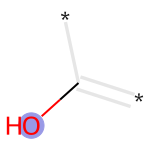

In [25]:
#Visualization
Draw.DrawMorganBit(aspirin,389,bit_asp)

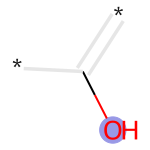

In [26]:
Draw.DrawMorganBit(salicylic_acid,389,bit_sal)

In [27]:
# calculate the intersection and union
intersection = set(salicylic_acid_fp.GetOnBits()) & set(aspirin_fp.GetOnBits())
print("intersection:", intersection)
print("How many bits?:", len(intersection))

Union = set(salicylic_acid_fp.GetOnBits()) | set(aspirin_fp.GetOnBits())
print("Union:", Union)
print("How many bits?:", len(Union))

# calculate the Tanimoto coefficient
print(f'Tanimoto coefficient {len(intersection)/len(Union)}')



intersection: {1088, 1380, 389, 807, 456, 1447, 650, 1991, 1199, 1873, 1750, 1047, 1917}
How many bits?: 13
Union: {1410, 389, 650, 1035, 909, 1047, 1057, 807, 1447, 1831, 1199, 1970, 695, 1211, 1468, 1088, 1729, 1602, 1607, 456, 1991, 1616, 1873, 1750, 1380, 1519, 1775, 1017, 1917}
How many bits?: 29
Tanimoto coefficient 0.4482758620689655


In [28]:
# rdkit function to calculate Similarity
from rdkit.Chem import DataStructs
print("TanimotoSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.TanimotoSimilarity))
print("DiceSimilarity", DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.DiceSimilarity))
print("CosineSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.CosineSimilarity))

TanimotoSimilarity 0.4482758620689655
DiceSimilarity 0.6190476190476191
CosineSimilarity 0.6254627916220946


#Query molecule through FingerPrint
[related paper](https://pubs.acs.org/doi/pdf/10.1021/ci9803381?casa_token=VL8YLBlPerYAAAAA:5TeiBQCWe3SC020iL04q1ZUvlftWzCMm7fIShE4I2Q6OS5OQGVowA5mvOKU9Ana2nYzzuC5AHXDhp_gsMg)

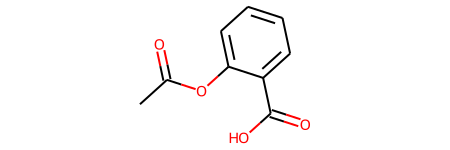

In [29]:
query = AllChem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
query_fps = AllChem.GetMorganFingerprintAsBitVect(query, 2, nBits=4096)
query

In [30]:
#calculate Fingerprints for all compound
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]

In [31]:
#calcualte Tanimoto coefficient
Tanimoto_similarity = [DataStructs.FingerprintSimilarity(query_fps, x, metric=DataStructs.TanimotoSimilarity) for x in all_Mfpts]
#add it to df
dataset['tanimoto_coeff']= Tanimoto_similarity

In [32]:
#sort df by tanimoto coeff values
dataset_sorted = dataset.sort_values(['tanimoto_coeff'], ascending=False)
dataset_sorted[['SMILES','tanimoto_coeff']][:10]

,SMILES,tanimoto_coeff
1339,CC(=O)Oc1ccccc1C(=O)O,1.000000
2518,COc1ccccc1C(=O)O,0.655172
2504,CCOc1ccccc1C(=O)O,0.593750
1226,OC(=O)c1ccccc1Oc1ccccc1,0.562500
2387,OC(=O)c1ccccc1C(=O)O,0.538462
2728,Cc1ccccc1C(=O)O,0.500000
2726,COc1cccc(C(=O)O)c1OC,0.500000
2606,OC(=O)c1ccccc1c1ccccc1C(=O)O,0.482759
1014,OC(=O)c1ccccc1C(=O)c1ccccc1,0.468750
1080,COc1ccccc1C(=O)C,0.468750


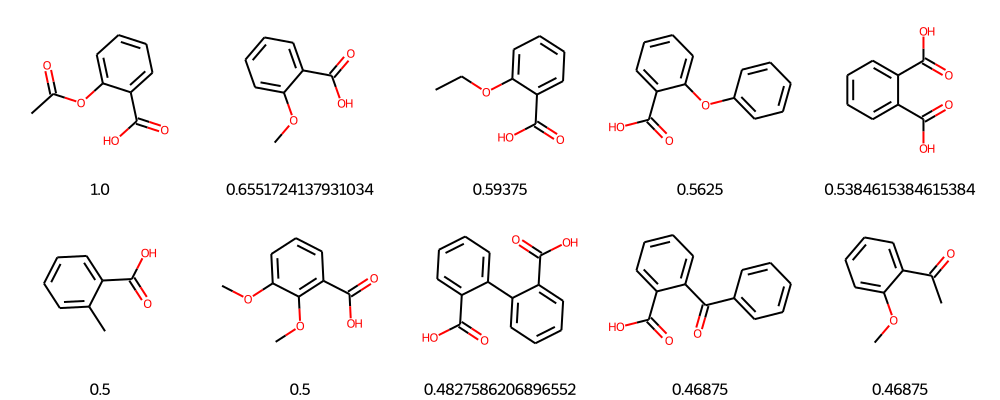

In [33]:
# visualize the top 10

Draw.MolsToGridImage([x for x in dataset_sorted["Structure"]][:10], maxMols=100,
                     legends=[str(x) for x in dataset_sorted.tanimoto_coeff], subImgSize=(200,200), molsPerRow=5)


#Taylor_butina clustering
[Based on this notebook](https://github.com/PatWalters/workshop/blob/master/clustering/taylor_butina.ipynb)
Four steps:
1. calculate fingerprint for each mol
2.calculate similarity between each mol
3. create a distance matrix (1- similarity)
4. Assign a cluster ID for each mol

In [34]:
from rdkit.ML.Cluster import Butina

def butina_cluster(mol_list,cutoff=0.35):
    fp_list = [AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048) for m in mol_list]
    dists = []
    nfps = len(fp_list)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fp_list[i],fp_list[:i])
        dists.extend([1-x for x in sims])
    mol_clusters = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    cluster_id_list = [0]*nfps  # initialize with zeros
    for idx,cluster in enumerate(mol_clusters,1):
        for member in cluster:
            cluster_id_list[member] = idx
    return cluster_id_list

In [42]:
df_test = dataset_sorted[:50].copy()
%time df_test['cluster']=butina_cluster(df_test.Structure.values)

CPU times: user 5.38 ms, sys: 0 ns, total: 5.38 ms
Wall time: 5.39 ms


In [44]:
df_test[['SMILES','cluster','tanimoto_coeff']][-10:]

,SMILES,cluster,tanimoto_coeff
1284,Nc1cc2ccccc2cc1C(=O)O,11,0.361111
760,OC(=O)c1cccnc1Cl,10,0.361111
571,OC(=O)c1cccnc1Br,9,0.361111
680,CC(=O)Oc1ccc(cc1)C(=O)C,8,0.352941
946,CCOC(=O)c1ccccc1C(=O)OCC,7,0.352941
2702,COc1cc(N)c(cc1OC)C(=O)O,6,0.351351
281,OC(=O)c1ccc2ccccc2c1O,5,0.351351
2169,OC(=O)c1c[nH]c2ccccc12,4,0.351351
2762,CN(C)c1ccc(cc1)[N][N]c1ccccc1C(=O)O,3,0.348837
1753,CC(=O)c1ccc(cc1)C(=O)O,2,0.343750
